# Dataset Description

[This dataset](https://www.kaggle.com/datasets/threnjen/board-games-database-from-boardgamegeek) provides comprehensive information about various board games, including details such as their names, descriptions, publication years, complexity ratings, user ratings, player counts, age recommendations, and category classifications. The data is sourced from BoardGameGeek (BGG) and covers a wide range of board games.

This dataset provides the opportunity to derive insights into the board gaming industry, understanding which game attributes or categories tend to attract a wider audience and discerning patterns in what contributes to a game's overall success. These insights can inform game development strategies and marketing.


## Collection Process
The data in this dataset is primarily obtained from [BoardGameGeek (BGG)](https://boardgamegeek.com/), a website dedicated to cataloging board games and various tabletop games. While BGG does not have rigid criteria for determining a game's eligibility for inclusion, it expressly omits certain categories from consideration, including:

- Role Playing Games
- Electronic Games (e.g., XBox, PC, PlayStation, mobile)
- Toys
- Sports

According to the BoardGameGeek FAQ, their comprehensive database has been methodically and voluntarily curated by their user community, game by game. This invaluable dataset is readily accessible through versatile queries and the utilization of data mining techniques, rendering it a valuable resource for academic research.

The typical process of adding a game to their database includes reading the "Add A Game" page and completing the provided form. Game submissions are subject to approval by the administrators, with approval times typically ranging from a few days to a few weeks.


## Dataset Structure
For this project, we will mainly focus on the "games" table from the dataset.

For most files, each row represents a board game, and its columns rerpesent some characteristic of that board game. \
For user_ratings.csv, each row is a rating given by a user of a board game.

### Variables
**games.csv**

1. **BGGId:** - A unique identifier for each board game listing on BoardGameGeek.

2. **Name:** - The title of the board game.

3. **YearPublished:** - The initial release year of the board game.

4. **GameWeight:** - A rating indicating the difficulty or complexity level of the game (ranges from 0-5).

5. **AvgRating:** - The average rating given to the game by users (ranges from 0-10).

6. **BayesAvgRating:** - A weighted average rating that considers the number of reviews applied (ranges from 0-10).

7. **StdDev:** - The standard deviation associated with the Bayes average rating.

8. **MinPlayers:** - The minimum number of players required to play the game.

9. **MaxPlayers:** - The maximum number of players that can participate in the game.

10. **ComAgeRec:** - The minimum recommended age for players, as determined by the community.

11. **LanguageEase:** - An indication of the game's language complexity or requirements.

12. **BestPlayers:** - The player count that the community has voted as the best for the game.

13. **GoodPlayers:** - A list of player counts that the community considers suitable for the game.

14. **NumOwned:** - The number of users who own a copy of the game.

15. **NumWant:** - The number of users who have expressed interest in acquiring the game.

16. **NumWish:** - The number of users who have added the game to their wishlist.

17. **NumWeightVotes:** - The purpose of this column is not specified.

18. **MfgPlayTime:** - The playtime recommended by the game's manufacturer.

19. **ComMinPlaytime:** - The minimum playtime as determined by the gaming community.

20. **ComMaxPlaytime:** - The maximum playtime as determined by the gaming community.

21. **MfgAgeRec:** - The age recommendation provided by the game's manufacturer.

22. **NumUserRatings:** - The total count of user ratings given to the game.

23. **NumComments:** - The total count of comments and reviews provided by users.

24. **NumAlternates:** - The number of alternative versions or editions of the game.

25. **NumExpansions:** - The number of expansion packs or additional content released for the game.

26. **NumImplementations:** - The number of digital implementations or adaptations of the game.

27. **IsReimplementation:** - A binary indicator that specifies whether the game is a reimplementation of a previous one.

28. **Family:** - The family or category to which the game belongs.

29. **Kickstarted:** - A binary indicator specifying whether the game was funded through Kickstarter.

30. **ImagePath:** - The path to the game's image on the internet.

31. **Rank:boardgame:** - The game's overall ranking among all board games on BoardGameGeek.

32. **Rank:strategygames:** - The game's ranking within the strategy games category.

33. **Rank:abstracts:** - The game's ranking within the abstracts category.

34. **Rank:familygames:** - The game's ranking within the family games category.

35. **Rank:thematic:** - The game's ranking within the thematic games category.

36. **Rank:cgs:** - The game's ranking within the card games category.

37. **Rank:wargames:** - The game's ranking within the war games category.

38. **Rank:partygames:** - The game's ranking within the party games category.

39. **Rank:childrensgames:** - The game's ranking within the children's games category.

40. **Cat:Thematic:** - A binary indicator specifying whether the game falls into the thematic category.

41. **Cat:Strategy:** - A binary indicator specifying whether the game falls into the strategy category.

42. **Cat:War:** - A binary indicator specifying whether the game falls into the war category.

43. **Cat:Family:** - A binary indicator specifying whether the game falls into the family category.

44. **Cat:CGS:** - A binary indicator specifying whether the game falls into the card games category.

45. **Cat:Abstract:** - A binary indicator specifying whether the game falls into the abstract category.

46. **Cat:Party:** - A binary indicator specifying whether the game falls into the party games category.

47. **Cat:Childrens:** - A binary indicator specifying whether the game falls into the children's games category.

This file contains **47 variables with 21925 entries**.
________________________________________________________________________________________________________________________________
**mechanics.csv**

1. **BGGId** - BoardGameGeek game ID \
Remaining columns are various mechanics with binary flag 

This file contains **158 variables with 21925 entries**.
________________________________________________________________________________________________________________________________
**themes.csv**
1. **BGGId** - BoardGameGeek game ID \
Remaining columns are various themes with binary flag 

This file contains **218 variables with 21925 entries**.
________________________________________________________________________________________________________________________________
**subcategories.csv**
1. **BGGId** - BoardGameGeek game ID \
Remaining columns are various subcategories with binary flag 

This file contains **11 variables with 21925 entries**.
________________________________________________________________________________________________________________________________
**artists_reduced.csv**
1. **BGGId** - BoardGameGeek game ID
2. **Low-Exp Artist** - Indicates game has an unlisted artist with <= 3 entries\
Remaining columns are various artists with binary flag 

This file contains **1681 variables with 21925 entries**.
________________________________________________________________________________________________________________________________
**designers_reduced.csv**
1. **BGGId** - BoardGameGeek game ID
2. **Low-Exp Designer** - Indicates game has an unlisted designer with <= 3 entries\
Remaining columns are various designers with binary flag 
This file contains **1681 variables with 21925 entries**.
________________________________________________________________________________________________________________________________
**publishers_reduced.csv**
1. **BGGId** - BoardGameGeek game ID 
2. **Low-Exp Publisher** - Indicates game has an unlisted publisher with <= 3 entries\
Remaining columns are various publishers with binary flag 

This file contains **1866 variables with 21925 entries**.
________________________________________________________________________________________________________________________________
**user_ratings.csv**
1. **BGGId** - BoardGameGeek game ID 
2. **Rating** - Raw rating given by user
3. **Username** - User giving rating

This file contains **3 variables with 18942215 entries**.
________________________________________________________________________________________________________________________________
**ratings_distribution.csv**
1. **BGGId** - BoardGameGeek game ID 
2. **Numbers 0.0-10.0** - Number of ratings per rating header
3. **total_ratings** - Total number of ratings for game

This file contains **96 variables with 21925 entries**.

# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

### Load Relevant Files of Dataset

In [2]:
load_csv = lambda csv_name: pd.read_csv(f'dataset/{csv_name}.csv')

games = load_csv('games')
games = games[['BGGId', 'Name', 'GameWeight', 'AvgRating', 'YearPublished', 'NumOwned', 'MfgAgeRec', 'ComAgeRec']]
games.head()

,BGGId,Name,GameWeight,AvgRating,YearPublished,NumOwned,MfgAgeRec,ComAgeRec
0,1,Die Macher,4.3206,7.61428,1986,7498,14,14.366667
1,2,Dragonmaster,1.9630,6.64537,1981,1285,12,NaN
2,3,Samurai,2.4859,7.45601,1998,15578,10,9.307692
3,4,Tal der Könige,2.6667,6.60006,1992,638,12,13.000000
4,5,Acquire,2.5031,7.33861,1964,23735,12,11.410256


### Check if data needs to be cleaned

Before analyzing the data, we first check for any 'dirtiness' in the relevant columns.

In [3]:
def check_cleanliness_property(name, f):
    print(name + '\n---------------------\n')
    games.columns.map(lambda col: print(f"{col.ljust(14)}: {f(games[col])}"))
    print()

# check types 
check_cleanliness_property('Data Type', lambda s: s.dtype)

# check range of values
check_cleanliness_property('Range of Values', lambda s: f'[{s.min()}, {s.max()}]')

# check for missing values
check_cleanliness_property('Has missing values?', lambda s: s.isna().any())

# check for duplicates in games dataframe
print(f"Games has duplicate rows: {games.duplicated().any()}")

Data Type
---------------------

BGGId         : int64
Name          : object
GameWeight    : float64
AvgRating     : float64
YearPublished : int64
NumOwned      : int64
MfgAgeRec     : int64
ComAgeRec     : float64

Range of Values
---------------------

BGGId         : [1, 349161]
Name          : ["La Garde recule!", 聖杯サクセション (Throne and the Grail)]
GameWeight    : [0.0, 5.0]
AvgRating     : [1.04133, 9.91429]
YearPublished : [-3500, 2021]
NumOwned      : [0, 166497]
MfgAgeRec     : [0, 25]
ComAgeRec     : [2.0, 21.0]

Has missing values?
---------------------

BGGId         : False
Name          : False
GameWeight    : False
AvgRating     : False
YearPublished : False
NumOwned      : False
MfgAgeRec     : False
ComAgeRec     : True

Games has duplicate rows: False


All data types are appropriate. The table has no duplicate rows. With the possible exception of Year Published, the ranges of values of the features are within their allowable values, suggesting no default values are used to mark missing data. No column has missing values except for ComAgeRec.

### Clean YearPublished

We now investigate YearPublished further to see whether it really contains invalid values. We can visualize it with a histogram to see the spread of its values.

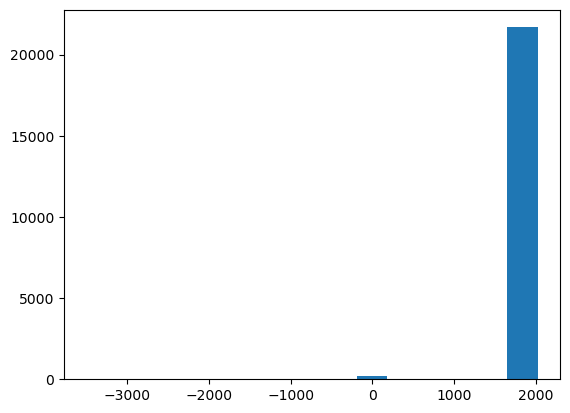

In [4]:
plt.hist(games['YearPublished'], bins=15)
plt.show()

We can observe from the graph that there are a small number of games with a year of publication less than 1000. 

In [5]:
pd.set_option('display.max_rows', None)

df = games.query('YearPublished < 1000')[['Name', 'YearPublished', 'NumOwned']].sort_values('YearPublished')
print("Number of board games with YearPublished < 1000:", df.shape[0])
df

Number of board games with YearPublished < 1000: 213


,Name,YearPublished,NumOwned
1723,Senet,-3500,1411
5345,Knucklebones,-3000,93
3356,Marbles,-3000,417
1721,Backgammon,-3000,18722
1195,The Royal Game of Ur,-2600,1279
164,Go,-2200,21331
2574,Nine Men's Morris,-1400,1733
6640,Three Men's Morris,-1400,63
5378,Tic-Tac-Toe,-1300,1439
3304,Chutes and Ladders,-200,4748


First, 0 is not a valid value for a year of publication because the Gregorian calendar does not have a 0th year, so entries with YearPublished = 0 were either encoded wrong or have 0 as a placeholder for a missing value. Second, there is nothing invalid about the values that are not 0, since some board games really were invented a very long time ago and negative values correspond to years 'BC'. Since there are only less than 213 rows with YearPublished = 0 out of over 21 thousand, we decide to remove them.

In [6]:
games = games[games['YearPublished'] != 0]
print('Number of rows after deletion:', games.shape[0])

Number of rows after deletion: 21732


### Clean ComAgeRec

In [7]:
print('Proportion of rows with missing ComAgeRec: ', games['ComAgeRec'].isna().sum() / games.shape[0])

Proportion of rows with missing ComAgeRec:  0.2511503773237622


There are many missing values there are in ComAgeRec, so it we do not want to delete them all. We also do not want to use MfgAgeRec as a substitute variable for representing age requirements either, since...

Number of Unique Values In MfgAgeRec: 21
Number of Unique Values In ComAgeRec: 1363


<Axes: xlabel='MfgAgeRec'>

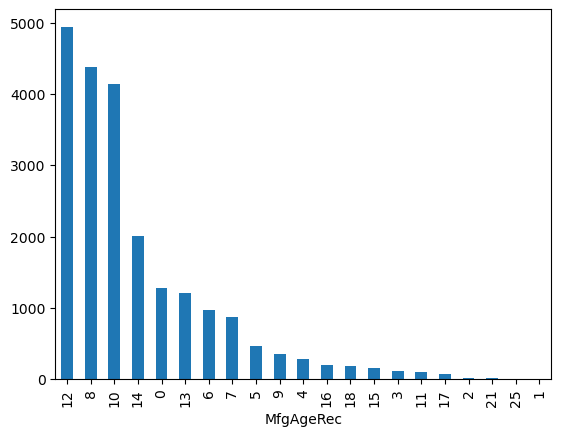

In [8]:
print('Number of Unique Values In MfgAgeRec:', games['MfgAgeRec'].unique().size)
print('Number of Unique Values In ComAgeRec:', games['ComAgeRec'].unique().size)

games['MfgAgeRec'].value_counts().plot.bar()

The variable looks categorical despite being numerical, likely due to the way manufacturers assign recommended ages to their board games. Because of this, we'll drop it and use imputation to handle the missing values in ComAgeRec. We use the median to replace missing values since it is more resistant to skewness and outliers compared to the mean.

In [9]:
games.drop(columns=['MfgAgeRec'], inplace=True)
games.fillna(games['ComAgeRec'].median(), inplace=True)

# check if dataframe was modified
games['ComAgeRec'].isna().sum()

0

# Exploratory Data Analysis

### Which variables have outliers?

Knowing that YearPublished has extreme values, we should also check the other features for outliers before looking at the distribution.

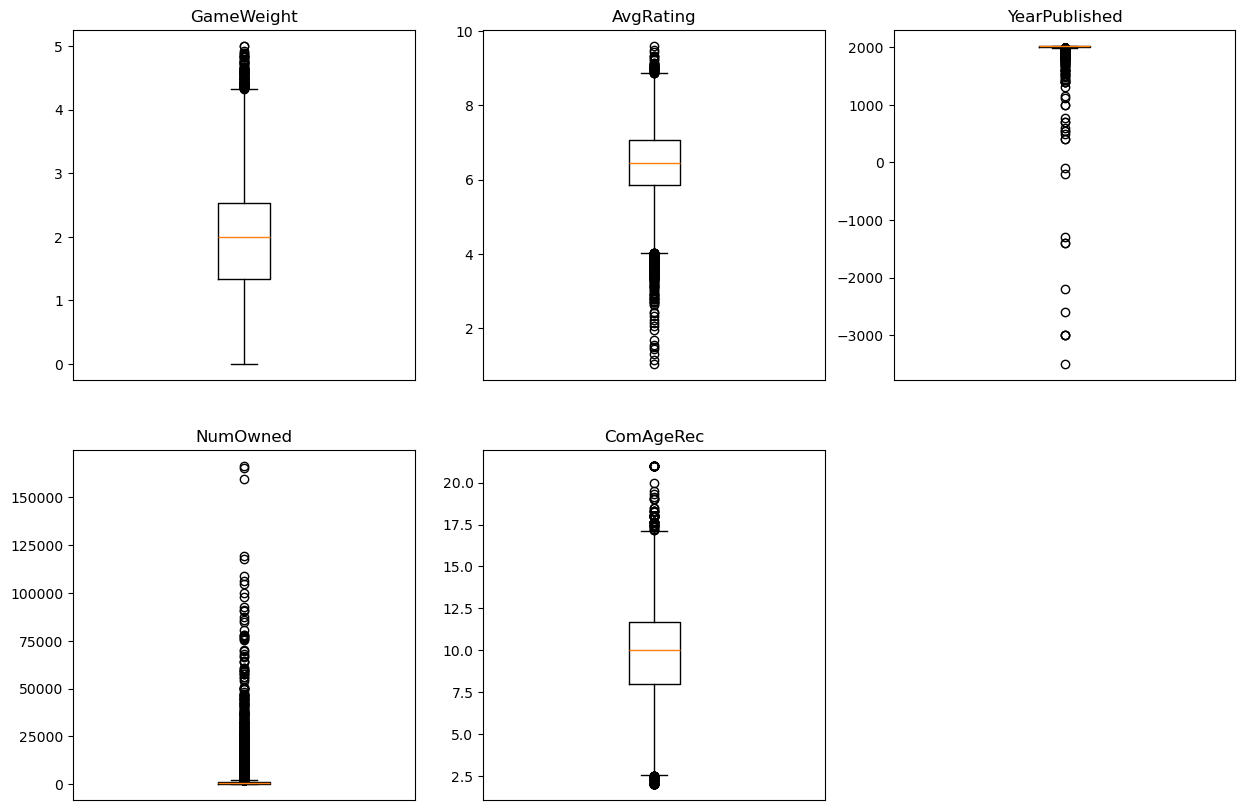

In [10]:
plot_vars = [col for col in games.columns[2:]]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in range(2):
    for j in range(3):
        if 3*i + j < len(plot_vars):
            ax[i, j].boxplot(games[plot_vars[3*i + j]])
            ax[i, j].title.set_text(plot_vars[3*i + j])
            ax[i, j].axes.get_xaxis().set_visible(False) # hide x-axis
        else:
            fig.delaxes(ax[i,j])
        
plt.show()

Looking at the boxplots, we can see that all the variables have extreme values. Since we don't yet know the distributions of the variables, we use the interquartile range to identify outliers instead of the Z-scores. Any observation greater than Q3 + 1.5(IQR) or less than Q1 - 1.5(IQR), i.e. any observation with a feature outside the whiskers, will be considered an outlier.

In [11]:
# get Q1, Q3, and IQR for every variable
quartiles = games[plot_vars].quantile([0.25, 0.75]) 
IQRs = pd.Series([quartiles[col][0.75] - quartiles[col][0.25] for col in plot_vars], index=plot_vars)

# return lower/upper whiskers of a variable using its quartile
def get_whisker(col, lower):
    dist = 1.5*IQRs[col]
    
    if lower:
        return quartiles[col][0.25] - dist
    else:
        return quartiles[col][0.75] + dist
    
lower_whiskers = pd.Series([get_whisker(col, True) for col in plot_vars], index=plot_vars)
upper_whiskers = pd.Series([get_whisker(col, False) for col in plot_vars], index=plot_vars)

print('Q1 and Q3\n', quartiles, '\n')
print('IQRs\n', IQRs, '\n')
print('Lower Whiskers:\n', lower_whiskers, '\n')
print('Upper Whiskers:\n', upper_whiskers, '\n')

filt = lambda row: row.between(lower_whiskers, upper_whiskers).all()

Q1 and Q3
       GameWeight  AvgRating  YearPublished  NumOwned  ComAgeRec
0.25     1.33330    5.84304         2002.0    152.00   8.000000
0.75     2.53115    7.05505         2017.0    907.25  11.666667 

IQRs
 GameWeight         1.197850
AvgRating          1.212010
YearPublished     15.000000
NumOwned         755.250000
ComAgeRec          3.666667
dtype: float64 

Lower Whiskers:
 GameWeight         -0.463475
AvgRating           4.025025
YearPublished    1979.500000
NumOwned         -980.875000
ComAgeRec           2.500000
dtype: float64 

Upper Whiskers:
 GameWeight          4.327925
AvgRating           8.873065
YearPublished    2039.500000
NumOwned         2040.125000
ComAgeRec          17.166667
dtype: float64 



We now check how many observations do not have at least one feature with an extreme value.

In [12]:
extreme = games.shape[0] - games[plot_vars].apply(filt, axis=1).sum()

print('Number of outliers:', extreme)
print('Proportion of extreme values:', extreme/games.shape[0])

Number of outliers: 4451
Proportion of extreme values: 0.20481317872262103


Since many observations have extreme values, we don't delete outlier observations. We don't cap them either since they represent something real about the data and capping them could affect the distributions.

### How are the variables distributed?

In particular, we would like to know whether the variables are normally distributed or not, as these determine what statistical methods will be most appropriate to apply.

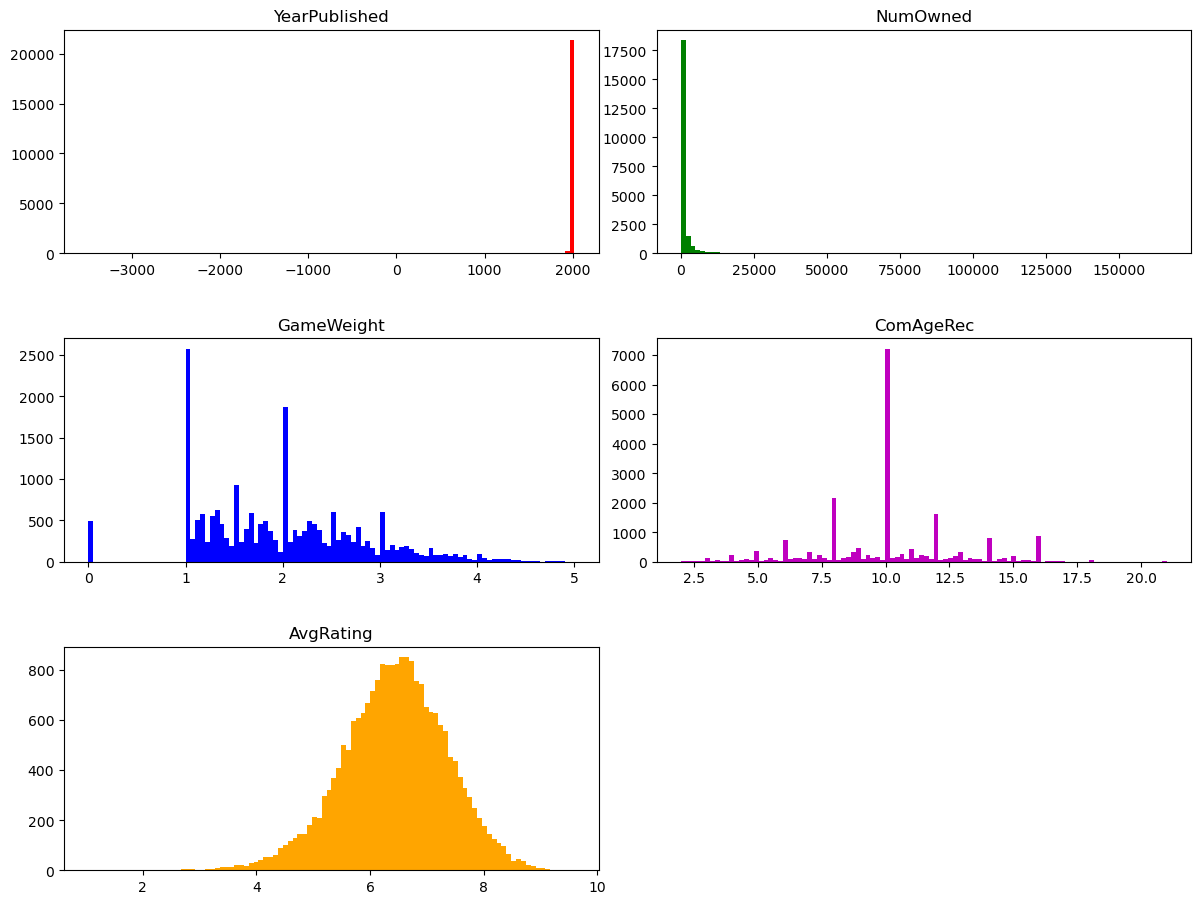

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(12, 9))
fig.tight_layout(h_pad=4)

ax[0, 0].hist(games['YearPublished'], bins=100, color='r')
ax[0, 0].set_title('YearPublished')

ax[0, 1].hist(games['NumOwned'], bins=100, color='g')
ax[0, 1].set_title('NumOwned')

ax[1, 0].hist(games['GameWeight'], bins=100, color='b')
ax[1, 0].set_title('GameWeight')

ax[1, 1].hist(games['ComAgeRec'], bins=100, color='m')
ax[1, 1].set_title('ComAgeRec')
                 
ax[2, 0].hist(games['AvgRating'], bins=100, color='orange')
ax[2, 0].set_title('AvgRating')

fig.delaxes(ax[2, 1])

plt.show()

Unfortunately, the only variable that is clearly normal is AvgRating. YearPublished and NumOwned also seem negatively and positively skewed, respectively.

### How much variety of board games is there?
There can obviously be many genres of board games, but we can also see how board games vary in terms of numerical variables, like their difficulty (GameWeight) or their recommended minimum age (ComAgeRec). A measure of dispersion will give us a quantitative idea of the variety board games. We use standard deviation since unlike the IQR, it considers all data points instead of just 2.

In [14]:
games[plot_vars].std(axis=0)

GameWeight          0.848584
AvgRating           0.928220
YearPublished     101.136499
NumOwned         5316.106352
ComAgeRec           2.823773
dtype: float64

An interesting observation can be made that GameWeight and AvgRating have very similar measures of dispersion with their standard deviations being almost equal. However, it must be noted that their range of values are different (0-5 for GameWeight and 0-10 for AvgRating), so we cannot make any assumptions based on their standard deviations alone.

### What are the central tendencies of the variables?

The median is the most appropriate measure to answer this because the variables are skewed and numerical.

In [15]:
games[plot_vars].median(axis=0)

GameWeight          1.99105
AvgRating           6.45861
YearPublished    2011.00000
NumOwned          324.00000
ComAgeRec          10.00000
dtype: float64

Another interesting observation can be made here: the median of YearPublished is 2011. This suggests that the number of games published within the 10-year span of 2011 to 2021 (2021 is when this dataset was last updated) is roughly equal to the number of games published before 2011, dating back to as far as 3500 BC. This is affirmed by the shape of the histogram of YearPublished shown above, which exhibits a very negative skew. 

### How are the variables related to each other?

Before using numerical measurements, we first use scatter plots too get a visual sense of whether variables are related.

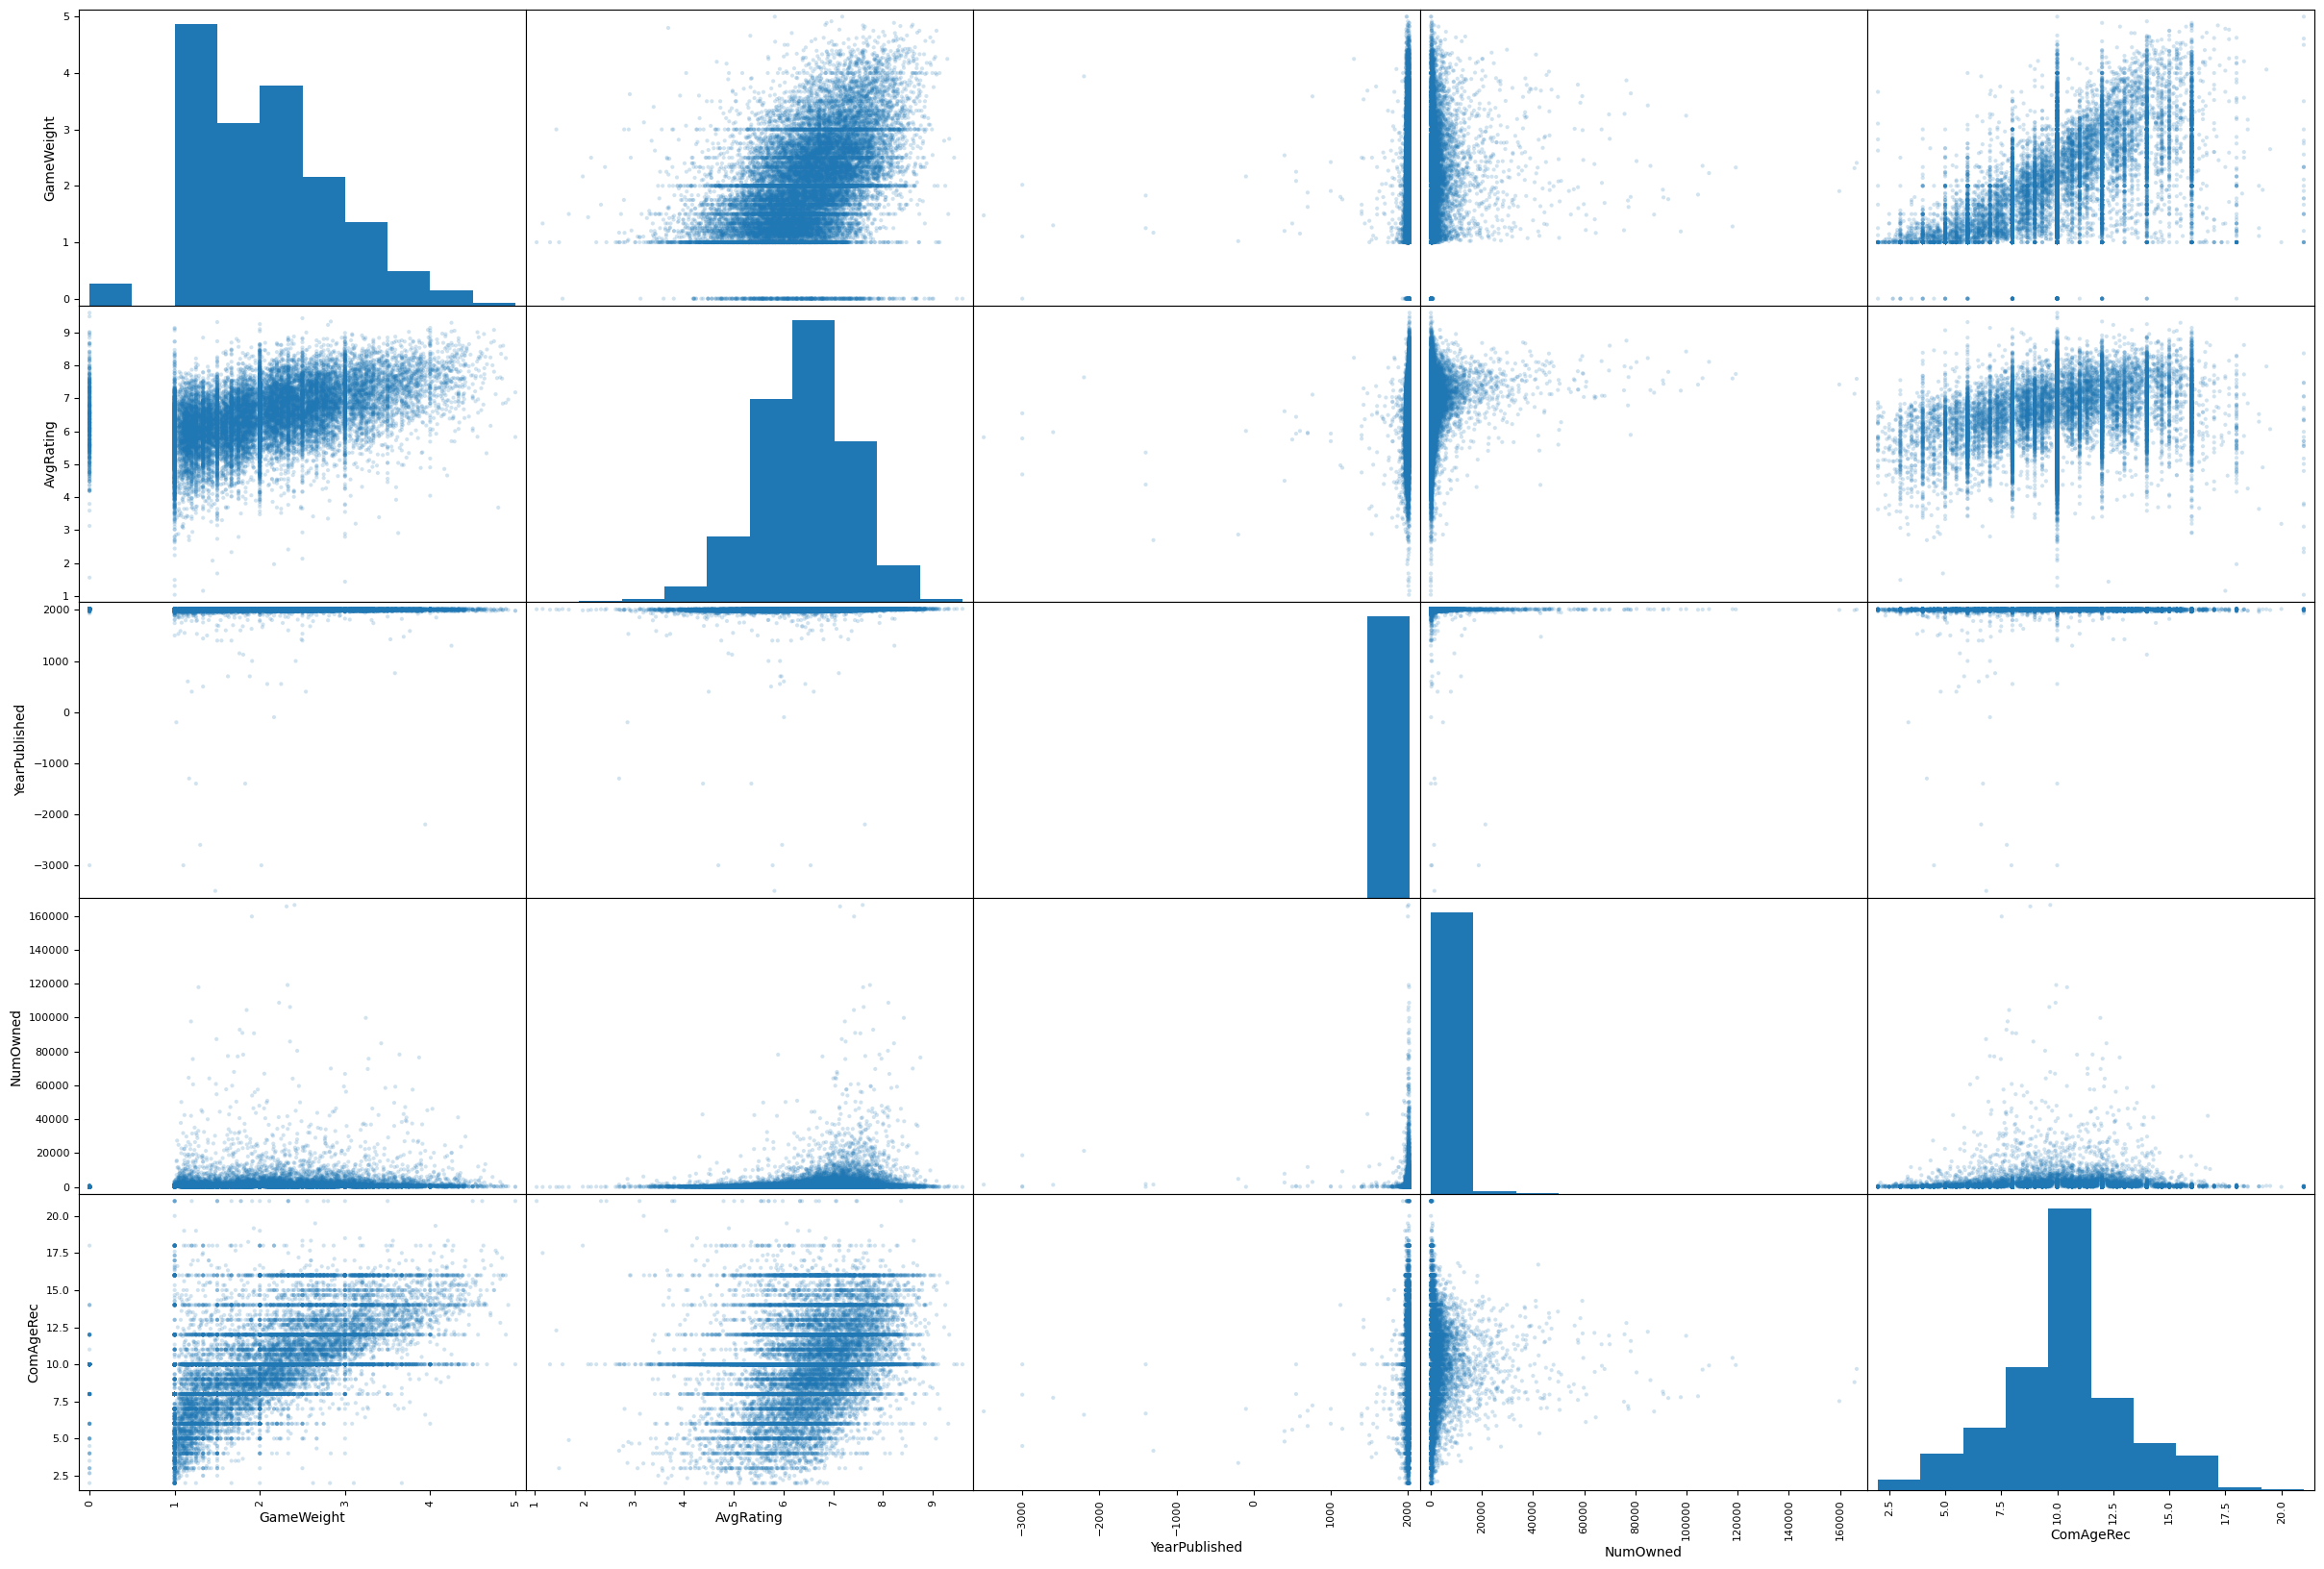

In [16]:
pd.plotting.scatter_matrix(games[plot_vars], figsize=(30, 20), alpha=0.2)
plt.show()

The only pairs of variables whose graphs clearly show monotonic relationships are GameWeight and AvgRating, GameWeight and ComAgeRec, and AvgRating and ComAgeRec. We'll now measure the correlations between pairs of variables, using both Spearman and Pearson correlation to see whether they produce different results given that the data is skewed and not normal.

In [17]:
pearson_matrix = games[plot_vars].corr(method='pearson')
pearson_matrix

,GameWeight,AvgRating,YearPublished,NumOwned,ComAgeRec
GameWeight,1.000000,0.476962,0.004283,0.088620,0.543550
AvgRating,0.476962,1.000000,0.075836,0.178393,0.282528
YearPublished,0.004283,0.075836,1.000000,-0.012580,0.029482
NumOwned,0.088620,0.178393,-0.012580,1.000000,0.005714
ComAgeRec,0.543550,0.282528,0.029482,0.005714,1.000000


In [18]:
spearman_matrix = games[plot_vars].corr(method='spearman')
spearman_matrix

,GameWeight,AvgRating,YearPublished,NumOwned,ComAgeRec
GameWeight,1.000000,0.504072,-0.029070,0.247832,0.568618
AvgRating,0.504072,1.000000,0.426731,0.288395,0.298801
YearPublished,-0.029070,0.426731,1.000000,0.066824,-0.036159
NumOwned,0.247832,0.288395,0.066824,1.000000,0.081619
ComAgeRec,0.568618,0.298801,-0.036159,0.081619,1.000000


There doesn't seem to be a difference in the results of Pearson's correlation and Spearman's correlation.

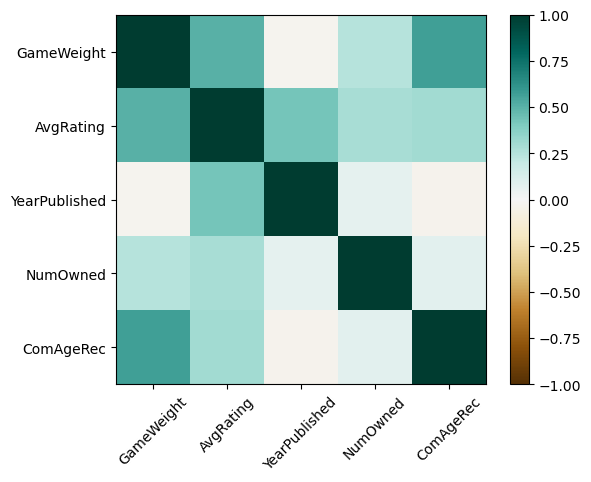

In [19]:
plt.imshow(spearman_matrix, cmap='BrBG', vmin=-1, vmax=1)
plt.xticks(np.arange(0., len(plot_vars), 1), labels=plot_vars, rotation=45)
plt.yticks(np.arange(0., len(plot_vars), 1), labels=plot_vars)
plt.colorbar()

plt.show()

Above is a heat map visualization of the spearman correlation matrix. The heat map shows something interesting, that when variables are correlated, they are usually positively correlated.

### Is there a significant relationship between the difficulty of a game and its average rating?

In the games dataframe, the GameWeight and AvgRating variables correspond to game difficulty and the average rating, respectively. 

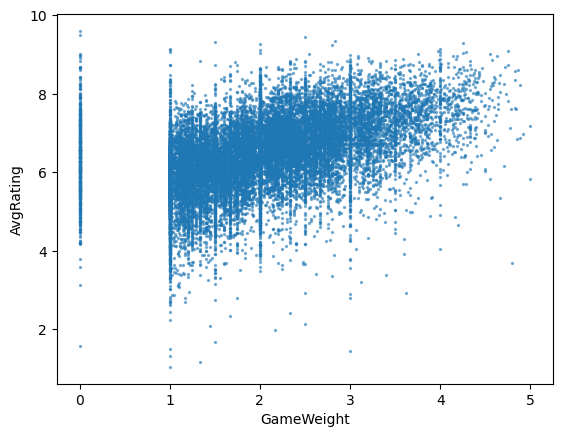

In [20]:
plt.scatter(games['GameWeight'], games['AvgRating'], s=2, alpha=0.5)
plt.xlabel('GameWeight')
plt.ylabel('AvgRating')
plt.show()

As noted earlier, game difficulty and and average rating visually seem positively related. We can perform a statistical test to determine whether this relationship is significant. We chose Spearman's correlation over Pearson's since it is not stricly limited to linear relationships.

$H_0$ - The correlation between game difficulty and average rating is negative or non-existent. \
$H_A$ - The correlation between game difficulty and average rating is positive.

In [21]:
result = sp.spearmanr(games['GameWeight'], games['AvgRating'], alternative='greater')
print(f'Statistic: {result.statistic}, p-value: {result.pvalue}')

Statistic: 0.5040721761092029, p-value: 0.0


The p-value may have been a small enough number that scipy decided to round it down to 0. Regardless, at 0.05 significance level, there is strong evidence that board games difficulty is positively related to average rating, i.e. more difficult games tend to be rated higher.

# Research Question

From our exploration, it is clear that board games are diverse, with their variables having different distributions, dispersions, having different ranges and central tendencies. Some of those variables are related. Which such diversity, finding a way to group similar board games together would paint a better picture of the current "landscape" of board games. 

A board game manufacturer may be interested in what board games are popular to increase their sales. For example, there may be a group of board games that are low rated but still popular due to being playable by ages. Or maybe a group of old games that are considered niche in modern times, but very highly rated within their playerbases. This information may also be useful to board game enthusiasts who need more information to decide what games they should purchase.

> The research question we aim to answer is: How can board games be grouped to understand the diversity/variety of board games that exist?

In [22]:
from kmedians import KMedians

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21732 entries, 0 to 21923
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BGGId          21732 non-null  int64  
 1   Name           21732 non-null  object 
 2   GameWeight     21732 non-null  float64
 3   AvgRating      21732 non-null  float64
 4   YearPublished  21732 non-null  int64  
 5   NumOwned       21732 non-null  int64  
 6   ComAgeRec      21732 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.3+ MB


In [24]:
kmedians = KMedians(10, 2, 7, len(games), games)
games.head()
len(games)

21732

In [25]:
kmedians.initialize_centroids(games)

,GameWeight,AvgRating,YearPublished,NumOwned,ComAgeRec
0,1.5,4.95349,1993,95,10.0
1,2.3056,6.15558,2007,839,10.0
2,2.3139,7.13746,1995,165651,8.8
3,1.078,6.04142,2015,50151,7.637255
4,3.47,6.27521,2015,3761,10.0
5,1.2281,6.27081,2008,1190,8.4
6,2.0,5.34314,2002,57,10.0
7,3.0,7.75152,2014,26,12.0
8,2.4231,6.65332,2015,916,10.0
9,2.45,6.43495,2013,2881,10.5


In [26]:
groups = kmedians.train(games, 20)
groups

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Done clustering!


0        9
1        8
2        4
3        1
4        3
5        7
6        9
7        0
8        5
9        4
10       2
11       3
12       2
13       8
14       9
15       8
16       8
17       3
18       5
19       1
20       7
21       9
22       8
23       1
24       1
25       5
26       5
27       4
28       6
29       8
30       5
31       1
32       1
33       8
34       0
35       6
36       6
37       0
38       4
39       3
40       0
41       8
42       3
43       4
44       4
45       8
46       4
47       2
48       4
49       1
50       7
51       3
52       6
53       1
54       5
55       8
56       9
57       1
58       1
59       8
60       1
61       5
62       1
63       1
64       7
65       5
66       4
67       9
68       8
69       3
70       5
71       1
72       8
73       0
74       0
75       1
76       0
77       5
78       8
79       1
80       4
81       8
82       8
83       4
84       3
85       9
86       8
87       8
88       8
89       4
90       9

In [27]:
groups.value_counts()

7    5893
6    4750
0    3539
1    2680
8    1951
5    1271
9     864
4     463
3     240
2      81
Name: count, dtype: int64

In [28]:
wcss_arr = []
for k in range(1, 10):
    kmedians = KMedians(k, 2, 7, len(games), games)
    kmedians.initialize_centroids(games)
    groups = kmedians.train(games, 300)
    
    wcss_arr.append(kmedians.get_wcss(games, groups))
print(wcss_arr)

Iteration 1
Iteration 2
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Done clustering!
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Ite

Elbow method:

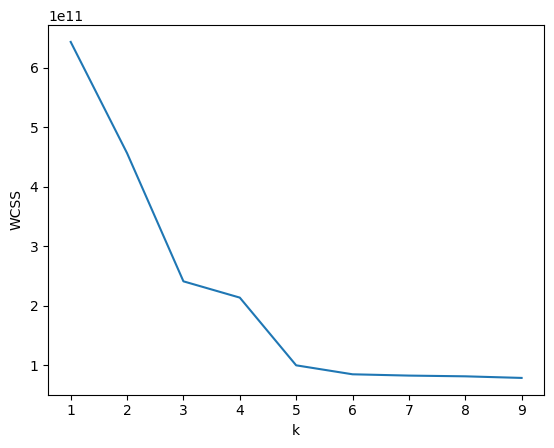

In [29]:
plt.plot(range(1, 10), wcss_arr)
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()